# Experiment 2

## Imports

In [1]:
from skrl.envs.wrappers.torch import wrap_env
import gymnasium as gym
from gymnasium.envs.registration import register
from bin_packing_agent import BinPackingAgent
from collections import namedtuple
from bins_states import EMPTY_BIN, EMPTY_SQUARE, ONE_BOX, ONE_BOX_ANTIOVERFIT
import torch
import warnings
warnings.filterwarnings('ignore')

## Environment setup

In [2]:
#set up the environment
register(
     id="PackingEnvNp-v0",
     entry_point="modules:PackingEnvNp",
     max_episode_steps=120
)
#env = gym.vector.make('PackingEnvNp-v0', num_envs=40, asynchronous=False)
env = gym.make('PackingEnvNp-v0', render_mode=None) #"human"
env = wrap_env(env)
device=env.device
Configuration = namedtuple('Configuration', ['learning_epochs', 'mini_batches', 'discount_factor'])
config = Configuration(learning_epochs = 10, mini_batches = 100, discount_factor = 0.99)

#initialize the BP agent
bpa = BinPackingAgent(env, device, config, "run", "RF-X")

[skrl:INFO] Environment class: gymnasium.core.Wrapper, gymnasium.utils.record_constructor.RecordConstructorArgs
[skrl:INFO] Environment wrapper: Gymnasium


## Load agent

In [3]:
bpa.load_agent('PATH/agent_2750000.pt')

## Validation

In [4]:
#torch.set_printoptions(threshold= 10_000)
bpa.validate(rollouts_no = 10000, single_rollout_max_length = 120)

Loading...: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [26:02<00:00,  6.40it/s]

Episode Length: 46.7096.
Mean: 80.4187521875%.
Median: 80.890625%.
Std: 3.9702714091529545%.
Variance: 15.763055062337386%.


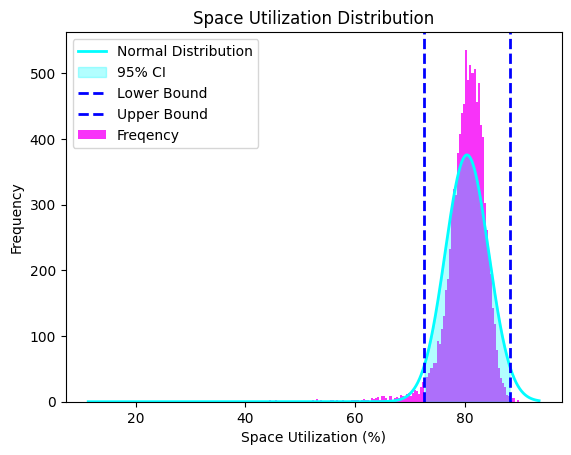

Lower bound:  72.63740932188597
Upper bound:  88.20009505311404
Span:  15.562685731228072


In [5]:
bpa.get_confidence_interval()